In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import yfinance as yf

In [14]:
# Load data
data = yf.download("AAPL", start="2000-01-01", end="2020-01-01")
data.reset_index(inplace=True)
data

#data = pd.read_csv("FB.csv")
#data

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-12-31,0.901228,0.918527,0.888393,0.917969,0.789364,163811200
1,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.859423,535796800
2,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.786965,512377600
3,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.798481,778321600
4,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.729382,767972800
...,...,...,...,...,...,...,...
5027,2019-12-24,71.172501,71.222504,70.730003,71.067497,70.234581,48478800
5028,2019-12-26,71.205002,72.495003,71.175003,72.477501,71.628067,93121200
5029,2019-12-27,72.779999,73.492500,72.029999,72.449997,71.600876,146266000
5030,2019-12-30,72.364998,73.172501,71.305000,72.879997,72.025833,144114400


In [15]:
# Prepare data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []
for i in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[i - prediction_days:i, 0])
    y_train.append(scaled_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [16]:
# Build model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

model.save('RNN_Model.h5')

Epoch 1/25
156/156 [==============================] - 18s 83ms/step - loss: 0.0119
Epoch 2/25
156/156 [==============================] - 13s 82ms/step - loss: 0.0011
Epoch 3/25
156/156 [==============================] - 13s 83ms/step - loss: 0.0011
Epoch 4/25
156/156 [==============================] - 13s 82ms/step - loss: 0.0011
Epoch 5/25
156/156 [==============================] - 13s 83ms/step - loss: 8.2346e-04
Epoch 6/25
156/156 [==============================] - 13s 83ms/step - loss: 9.9992e-04
Epoch 7/25
156/156 [==============================] - 13s 82ms/step - loss: 8.3039e-04
Epoch 8/25
156/156 [==============================] - 13s 83ms/step - loss: 7.4494e-04
Epoch 9/25
156/156 [==============================] - 13s 83ms/step - loss: 6.7533e-04
Epoch 10/25
156/156 [==============================] - 13s 83ms/step - loss: 5.7627e-04
Epoch 11/25
156/156 [==============================] - 13s 83ms/step - loss: 6.5053e-04
Epoch 12/25
156/156 [==============================] - 13

In [18]:
# Test the model accuracy on existing data
# Load test data
test_start = "2020-01-01"
test_end = "2021-08-07" # now
test_data = yf.download("AAPL", start=test_start, end=test_end)
test_data.reset_index(inplace=True)
test_data
#test_data = pd.read_csv('FB-2.csv')
#test_data

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,72.552094,100805600
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,74.207466,135480400
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.486023,146322800
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,74.071579,118387200
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.723213,108872000
...,...,...,...,...,...,...,...
377,2021-06-30,136.169998,137.410004,135.869995,136.960007,136.960007,63261400
378,2021-07-01,136.600006,137.330002,135.759995,137.270004,137.270004,52485800
379,2021-07-02,137.899994,140.000000,137.750000,139.960007,139.960007,78852600
380,2021-07-06,140.070007,143.149994,140.070007,142.020004,142.020004,107999000


In [19]:
actual_prices = test_data['Close'].values
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [20]:
# Make predictions on test data
x_test = []

for i in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[i - prediction_days:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

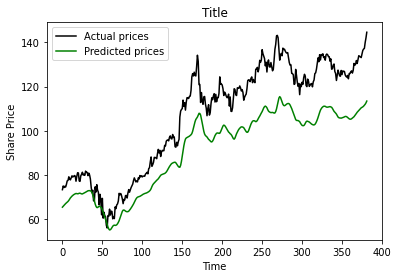

In [21]:
# Plot the test predictions
plt.plot(actual_prices, color='black',label='Actual prices')
plt.plot(predicted_prices, color='green', label='Predicted prices')
plt.title('Title')
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.legend()
plt.show()

In [22]:
# Predict next day
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print("Prediction: ")
print(prediction)

Prediction: 
[[114.48006]]
